In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Feature description:

**Date:** The specific trading date.

**Open:** The stock price at the start of the trading session.

**High:** The highest price at which the stock traded during the day.

**Low:** The lowest price at which the stock traded during the day.

**Last:** The Last price refers to the price at which the stock was last traded during the trading session.

**Close:** The stock price at the end of the trading session.

**Total Trade Quantity:** The total number of shares or units of a particular stock that were traded during a specific trading session or day.

**Turnover (Lacs):** The total monetary value of all trades conducted for a particular stock during a trading session, measured in lakhs (where 1 lakh = 100,000 units of currency). Turnover is the product of the number of shares traded (Total Trade Quantity) and the price of the stock.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [3]:
df.shape

(2035, 8)

In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Open')

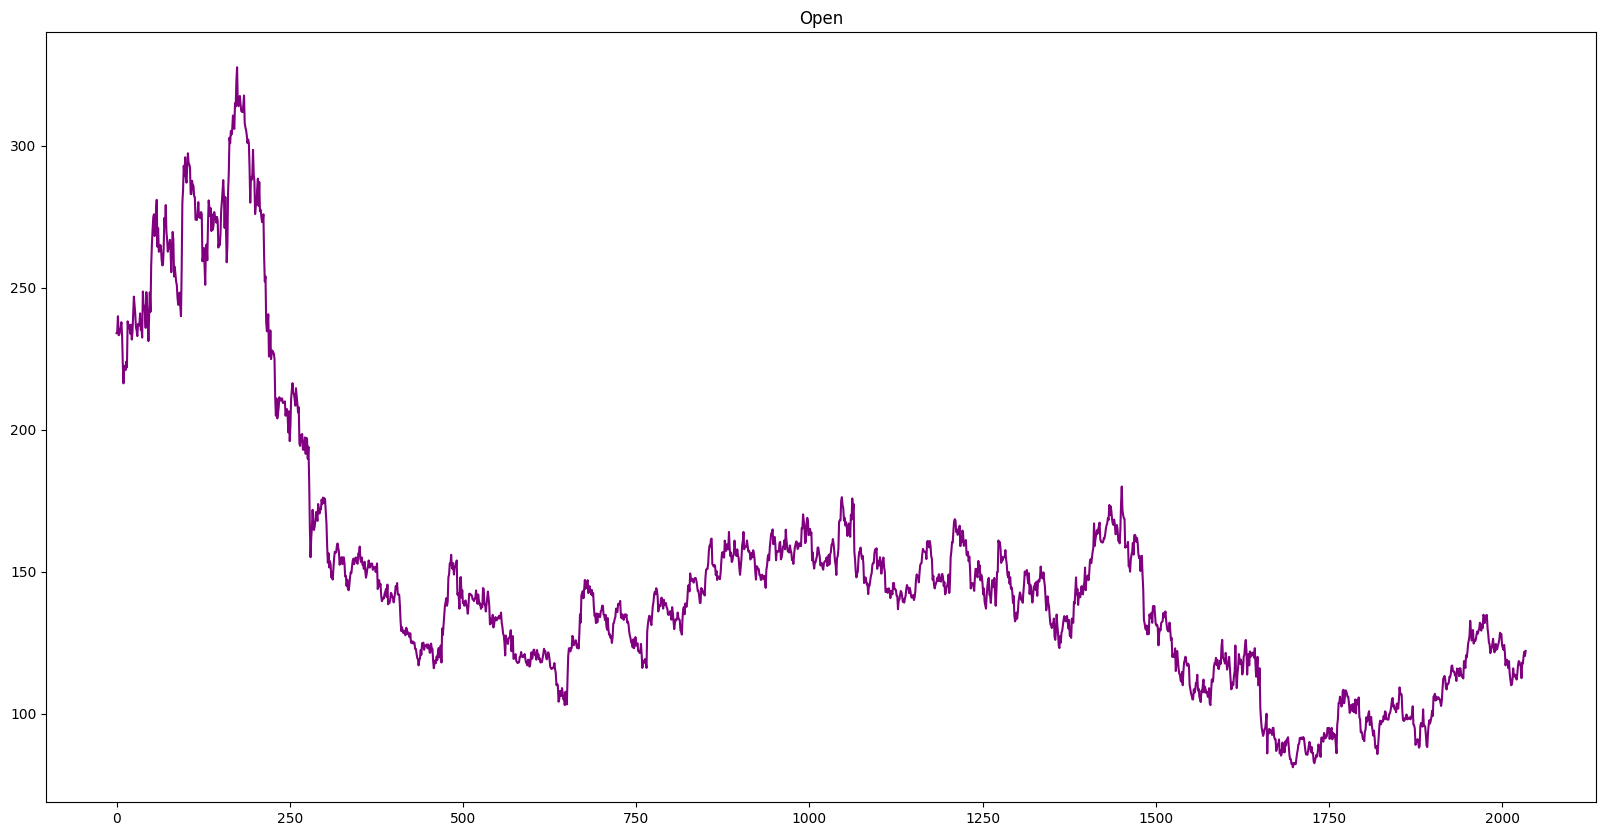

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'],label='Stock prize plot',color='purple')
plt.title("Open")

Text(0.5, 1.0, 'Close')

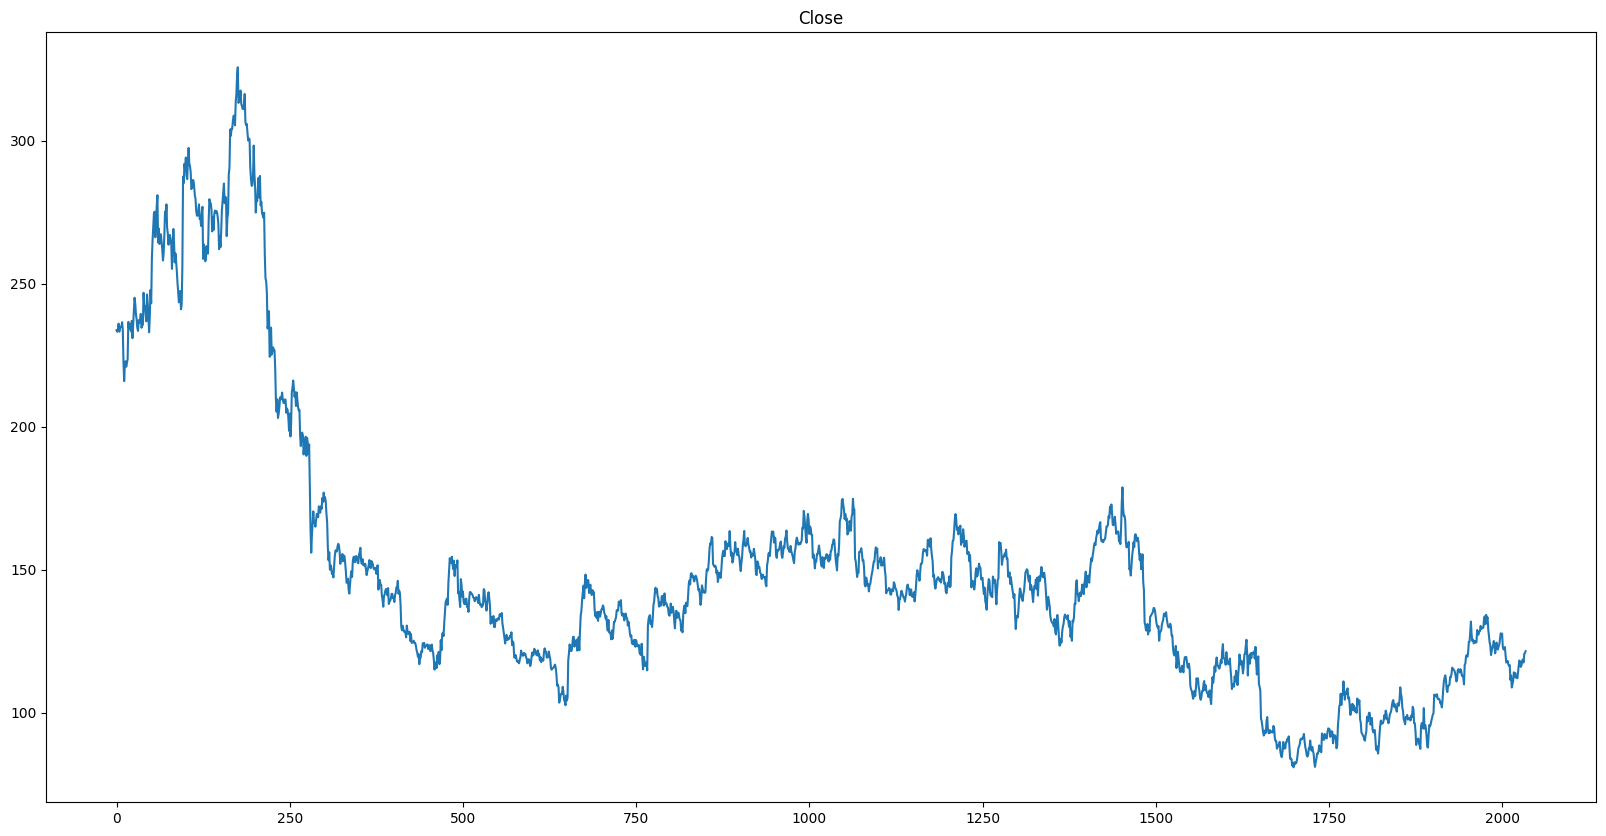

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df[['Close']],label='Stock prize plot')
plt.title("Close")

Scaling the values using MinMaxScaler as LSTM are sensitive to scale of the data 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df['Close']).reshape(-1,1))

In [34]:
df1.shape

(2035, 1)

In [77]:
# Splitting the dataset into train and test

training_size=int(len(df1)*0.8)
test_size=int(len(df1)-training_size)
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [78]:
training_size,test_size

(1628, 407)

In [79]:
len(train_data),len(test_data)

(1628, 407)

In [80]:
# convert an array of values into  a dataset matrix

def create_features(data,time_step=10):
    dataX,dataY=[],[]
    for i in range(len(data)-(time_step+1)):
        a=data[i:(i+time_step),0] # i=0, 0,1,2,3,.....,99  100
        dataX.append(a)
        dataY.append(data[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

In [81]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_features(train_data,time_step)
X_test,y_test=create_features(test_data,time_step)

In [82]:
X_train.shape,y_train.shape

((1527, 100), (1527,))

In [83]:
# reshaping input to be [samples , time_steps , features] which is required for LSTM

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building the Model

In [86]:
# Creating a Stacked LSTM model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [90]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\vidhya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=60,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0547 - val_loss: 0.0043
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0025 - val_loss: 7.4237e-04
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0016 - val_loss: 8.3502e-04
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0015 - val_loss: 7.6582e-04
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0013 - val_loss: 7.9171e-04
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0013 - val_loss: 6.1418e-04
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0013 - val_loss: 7.0562e-04
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0010 - val_loss: 4.8672e-04
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0010 - val_loss: 4.9415e-04
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0010 - val_loss: 6.2326e-04
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 9.6193e-04 - val_loss: 5.2435e-04


In [93]:
# lets do the prediction and check the performance metrics 

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [94]:
# Tranform back to original form 

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
# Calcualte RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.30651750319007

In [96]:
# Test data  RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

107.05018433393336

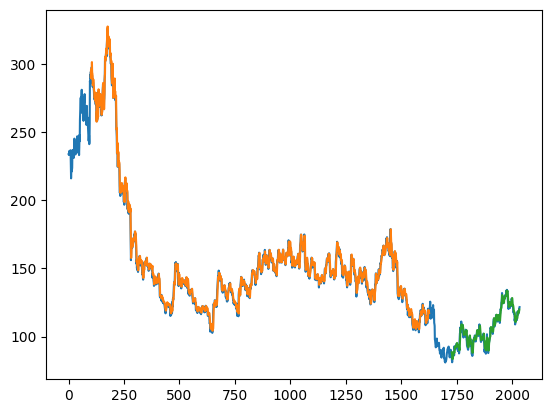

In [98]:
### Plotting 
# Shift train predictions for plotting 
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# Shift train predictions for plotting 
look_back=100
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

# Plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [99]:
len(test_data)

407

In [102]:
X_input=test_data[307:].reshape(1,-1)
X_input.shape

(1, 100)

In [103]:

temp_input=list(X_input)
temp_input=temp_input[0].tolist()
temp_input
     

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [104]:

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))

        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16680822]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [105]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

2035

## Plots to see the predicted output

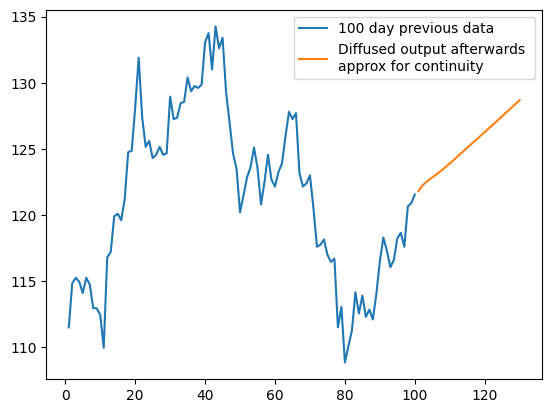

In [107]:
# plotting last 100 days 

plt.plot(day_new,scaler.inverse_transform(df1[1935:]),label='100 day previous data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Diffused output afterwards \napprox for continuity')
plt.legend()

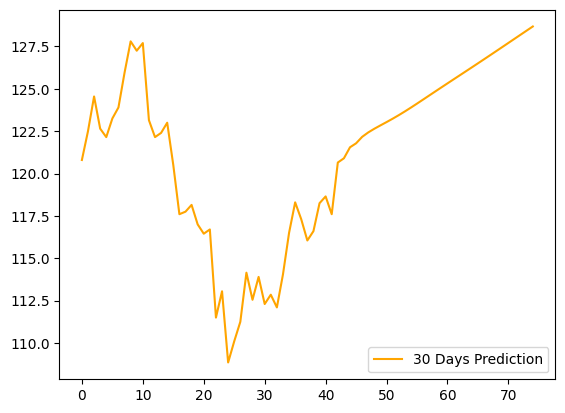

In [117]:
# plotting predicted 30 days 

df2=df1.tolist()
df2.extend(lst_output)
plt.plot(scaler.inverse_transform(df2[1990:]),color='orange',label='30 Days Prediction')
plt.legend()
     

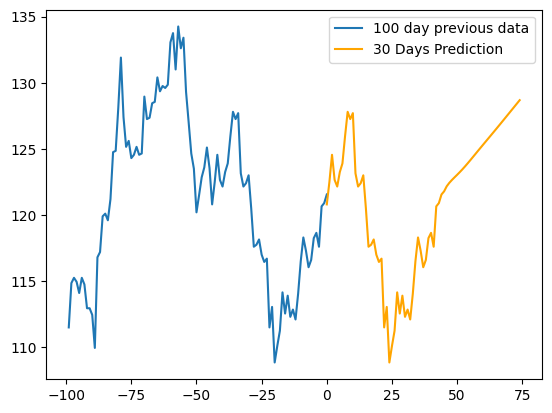

In [114]:
# plotting last 100 days + predicted 30 days 

plt.plot(day_new-100,scaler.inverse_transform(df1[1935:]),label='100 day previous data')
plt.plot(scaler.inverse_transform(df2[1990:]),color='orange',label='30 Days Prediction')
plt.legend()